In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tifffile import tifffile
from PIL import Image
import zipfile
from scipy import stats
import matplotlib
import pylops

In [270]:
path = '/data/sar/SynthWakeSar/'

In [271]:
#with zipfile.ZipFile(path + 'N.zip', 'r') as zip_ref:
#    zip_ref.extractall('./data/synthetic-data/N_data')

#with zipfile.ZipFile(path + 'D.zip', 'r') as zip_ref:
#    zip_ref.extractall('./data/synthetic-data/D_data')

#with zipfile.ZipFile(path + 'NF.zip', 'r') as zip_ref:
#    zip_ref.extractall('./data/synthetic-data/NF_data')

# sample_file_path = '../../../../../../data/sar/asf_examples/S1A_IW_GRDH_1SDV_20231211T005416_20231211T005441_051600_063AD7_17AB.SAFE/measurement/' 
# image = sample_file_path + "s1a-iw-grd-vh-20231211t005416-20231211t005441-051600-063ad7-002.tiff"

In [272]:
N_image_file = "./data/synthetic-data/N_data/1_2.png"
NF_image_file = "./data/synthetic-data/NF_data/1_2.png"
D_image_file = "./data/synthetic-data/D_data/1_2.png"

In [273]:
n_im = Image.open(N_image_file)
nf_im = Image.open(NF_image_file)
d_im = Image.open(D_image_file)
print(n_im.size, nf_im.size, d_im.size)

(227, 227) (227, 227) (227, 227)


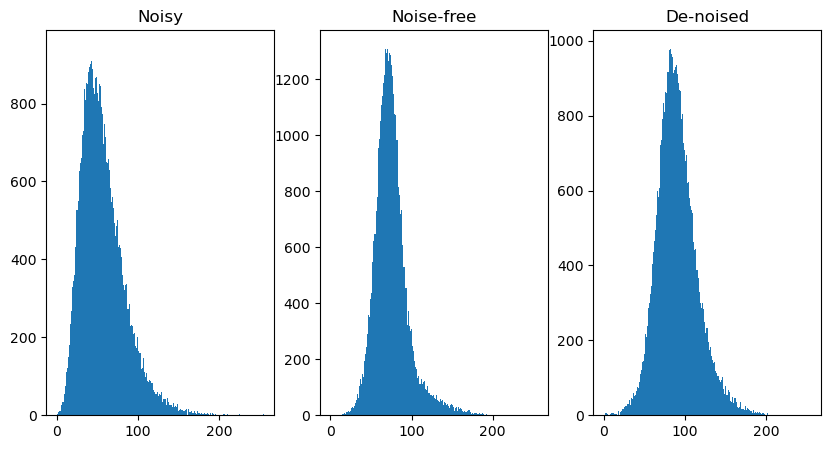

In [274]:
# from PIL import Image
n_im_array = np.array(n_im.getdata())
nf_im_array = np.array(nf_im.getdata())
d_im_array = np.array(d_im.getdata())

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
n,bins,patches = ax[0].hist(n_im_array, bins=range(256), edgecolor='none')
ax[0].set_title("Noisy")
n,bins,patches = ax[1].hist(nf_im_array, bins=range(256), edgecolor='none')
ax[1].set_title("Noise-free")
n,bins,patches = ax[2].hist(d_im_array, bins=range(256), edgecolor='none')
ax[2].set_title("De-noised")
#ax.set_xlim(0,255)
#cm = plt.cm.get_cmap('cool')
#norm = matplotlib.colors.Normalize(vmin=bins.min(), vmax=bins.max())
#for b,p in zip(bins,patches):
#    p.set_facecolor(cm(norm(b)))
plt.show()

In [275]:
nimage = np.array(n_im.getdata())
nfimage = np.array(nf_im.getdata())
dimage = np.array(d_im.getdata())

In [276]:
print("Max: ", np.max(nimage))
print(type(nimage))
print("Mean: ", np.mean(nimage))
print("Median: ", np.median(nimage))
print("25th percentile: ", np.percentile(nimage, 25))
print("75th percentile: ", np.percentile(nimage, 75))

Max:  255
<class 'numpy.ndarray'>
Mean:  56.41869626812086
Median:  52.0
25th percentile:  37.0
75th percentile:  71.0


In [277]:
print("Max: ", np.max(nfimage))
print(type(nfimage))
print("Mean: ", np.mean(nfimage))
print("Median: ", np.median(nfimage))
print("25th percentile: ", np.percentile(nfimage, 25))
print("75th percentile: ", np.percentile(nfimage, 75))

Max:  255
<class 'numpy.ndarray'>
Mean:  75.04944788371597
Median:  72.0
25th percentile:  62.0
75th percentile:  84.0


In [278]:
print("Max: ", np.max(dimage))
print(type(dimage))
print("Mean: ", np.mean(dimage))
print("Median: ", np.median(dimage))
print("25th percentile: ", np.percentile(dimage, 25))
print("75th percentile: ", np.percentile(dimage, 75))

Max:  255
<class 'numpy.ndarray'>
Mean:  89.75396378738186
Median:  87.0
25th percentile:  73.0
75th percentile:  104.0


(227, 227)


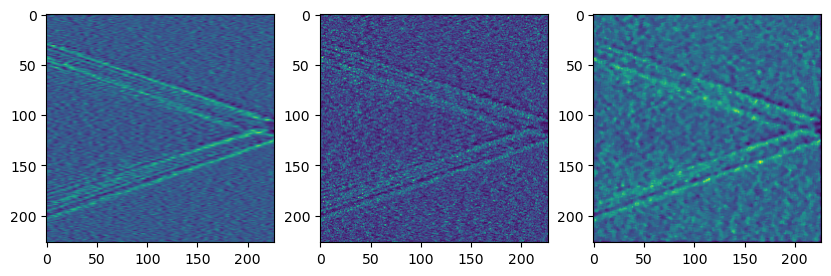

In [353]:
print(d_im.size)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(nf_im)
axs[1].imshow(n_im)
axs[2].imshow(d_im)

In [329]:
import pytest
import skimage as ski
from skimage.restoration import denoise_wavelet, estimate_sigma, denoise_tv_bregman, denoise_bilateral, calibrate_denoiser, denoise_tv_chambolle
from skimage import color, data
import skimage.data
from skimage import img_as_float

In [358]:
# add random noise to noise-free image:
img = ski.img_as_float(nf_im)               # Noise-Free image as float
# img = color.rgb2gray(img)
rng = np.random.default_rng()               # random  
img += 0.1 * rng.standard_normal(img.shape) # adding noise
# img += 0.05 * rng.standard_normal(img.shape) # adding noise
img = np.clip(img, 0, 1)                    # clipping values outside 0-1
denoised_img = denoise_wavelet(img, sigma=0.1, rescale_sigma=True)

In [360]:
# Adding Noise:
# img = ski.img_as_float(n_im)
# sigma = 0.1
# rng = np.random.default_rng()
# img = img + sigma * rng.standard_normal(img.shape)

## Estimating Noise:

sigma_estimation = estimate_sigma(img, channel_axis=None)
sigma_estimation

0.0986068428114893

Text(0.5, 1.0, 'Wavelet De-noised')

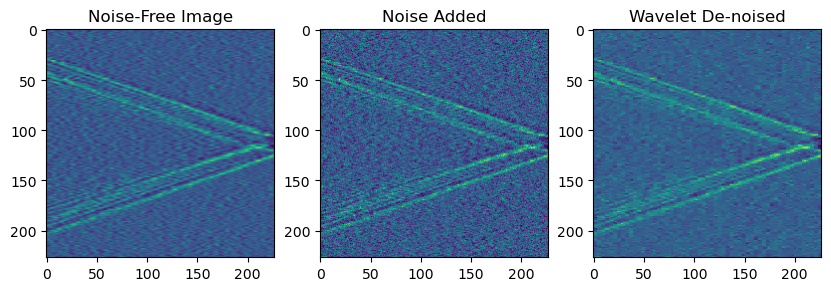

In [359]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(nf_im)
axs[1].imshow(img)
axs[2].imshow(denoised_img)
axs[0].set_title("Noise-Free Image")
axs[1].set_title("Noise Added")
axs[2].set_title("Wavelet De-noised")

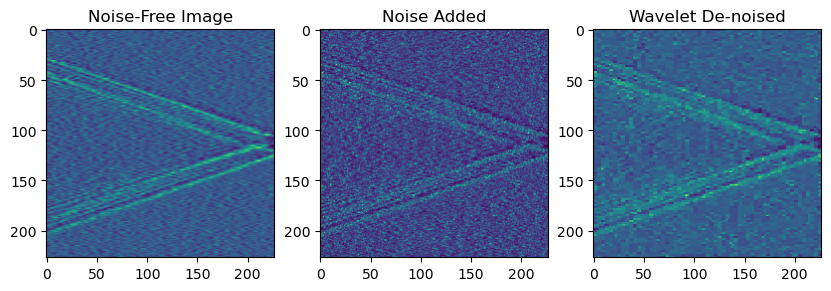

In [328]:

img = ski.img_as_float(n_im)   # Noisy image as float
wavelet_denoised_img = denoise_wavelet(img, sigma=0.1, rescale_sigma=True)
tv_denoised_img = denoise_tv_chambolle(img, weight=0.2) #  eps=5
tv_bregman_denoised_img = denoise_tv_bregman(img, weight=0.2, eps=0.5)
bilateral_denoise_img =  denoise_bilateral(img, sigma_spatial = 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(nf_im)
axs[1].imshow(n_im)
axs[2].imshow(wavelet_denoised_img)
# axs[3].imshow(tv_denoised_img)
# axs[4].imshow(tv_bregman_denoised_img)
# axs[5].imshow(bilateral_denoise_img)
axs[0].set_title("Noise-Free Image")
axs[1].set_title("Noise Added")
axs[2].set_title("Wavelet De-noised")
# axs[3].set_title("TV De-noised")
# axs[4].set_title("TV Bregman De-noised")
# axs[5].set_title("Bilateral De-noised")
plt.show()

Text(0.5, 1.0, 'Calibrated Wavelet De-noised')

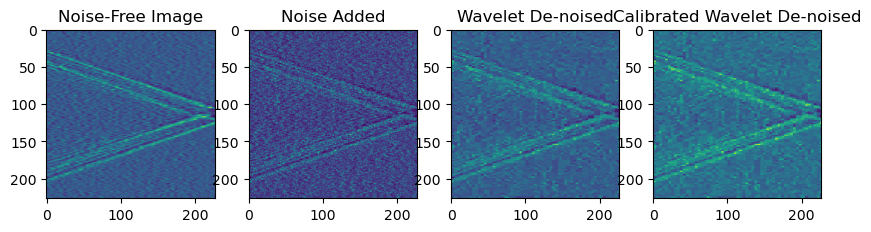

In [351]:
# wavelet_denoised_img = denoise_wavelet(img, sigma=0.1, rescale_sigma=True)
img = ski.img_as_float(n_im)   # Noisy image as float

# denoising_function = calibrate_denoiser(img, denoise_wavelet, denoise_parameters=parameters)

parameter_ranges = {'sigma': np.arange(0.1, 0.3, 0.01)}
wavelet_denoised_img = denoise_wavelet(img, sigma=0.1, rescale_sigma=True)

calibrated_denoiser = calibrate_denoiser(img, denoise_wavelet, denoise_parameters=parameter_ranges)
# Denoised image using calibrated denoiser
calibrated_denoised_img = calibrated_denoiser(img)

fig, axs = plt.subplots(1, 4, figsize=(10, 5))
axs[0].imshow(nf_im)
axs[1].imshow(n_im)
axs[2].imshow(wavelet_denoised_img)
axs[3].imshow(calibrated_denoised_img)
axs[0].set_title("Noise-Free Image")
axs[1].set_title("Noise Added")
axs[2].set_title("Wavelet De-noised")
axs[3].set_title("Calibrated Wavelet De-noised")

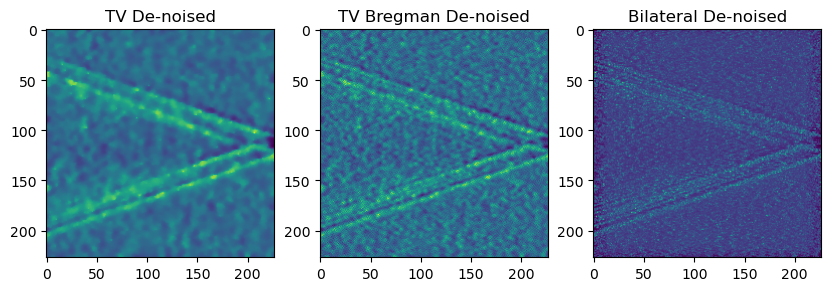

In [305]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(tv_denoised_img)
axs[1].imshow(tv_bregman_denoised_img)
axs[2].imshow(bilateral_denoise_img)
axs[0].set_title("TV De-noised")
axs[1].set_title("TV Bregman De-noised")
axs[2].set_title("Bilateral De-noised")
plt.show()

In [306]:
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration


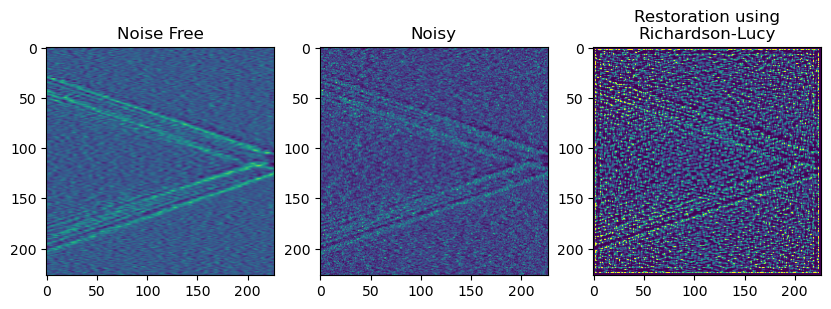

In [326]:
# Restore Image using Richardson-Lucy algorithm
psf = np.ones((5, 5)) / 25
deconvolved_RL = restoration.richardson_lucy(img, psf, num_iter=50)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(nf_im)
axs[1].imshow(n_im)
axs[2].imshow(deconvolved_RL)
axs[0].set_title("Noise Free")
axs[1].set_title("Noisy")
axs[2].set_title("Restoration using\nRichardson-Lucy")
plt.show()

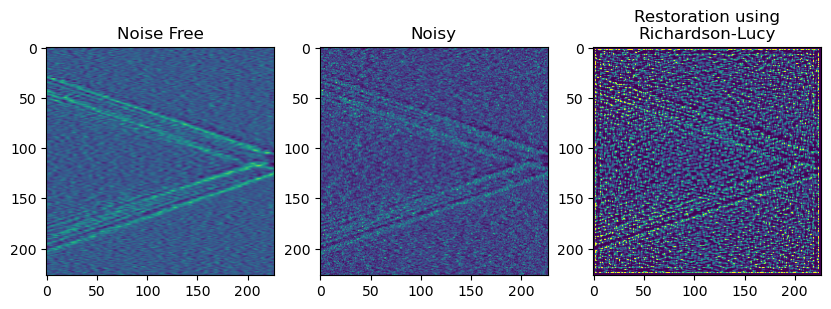

In [315]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(nf_im)
axs[1].imshow(n_im)
axs[2].imshow(deconvolved_RL)
axs[0].set_title("Noise Free")
axs[1].set_title("Noisy")
axs[2].set_title("Restoration using\nRichardson-Lucy")
plt.show()

In [ ]:

# Robust wavelet-based estimator of the (Gaussian) noise standard deviation.

In [ ]:
img = ski.img_as_float(n_im)
# sigma = 0.1
# rng = np.random.default_rng()
# img = img + sigma * rng.standard_normal(img.shape)
sigma_hat = estimate_sigma(img, channel_axis=None)
sigma_hat

0.06044826312676831

In [ ]:
img = ski.img_as_float(d_im)
sigma_hat = estimate_sigma(img, channel_axis=None)
sigma_hat

0.01145960610489315

In [ ]:
img = ski.img_as_float(nf_im)
sigma_hat = estimate_sigma(img, channel_axis=None)
sigma_hat

0.011329157514114865